In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams['figure.dpi'] = 200

In [72]:
data = pd.read_csv('iris.data',header=None)

In [73]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [74]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [16]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('Wrong classified: ', (y_test != y_pred).sum()) #количество наблюдений, который былинеправильно определены

Wrong classified:  3


In [19]:
print(gnb.score(X_test, y_test))
print(gnb.class_prior_)
print(gnb.epsilon_)
print(gnb.sigma_)

0.96
[0.38666667 0.28       0.33333333]
3.495370666666667e-09
[[0.09281808 0.13191439 0.02625446 0.01001189]
 [0.25727892 0.10698413 0.23142857 0.04331066]
 [0.569856   0.1288     0.4184     0.060576  ]]


In [69]:
def plot_clf(clf, title=""):
    test_sizes = np.arange(0.05, 0.95, 0.05)
    wrong_results = []
    accuracies = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630414)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        accuracies.append(clf.score(X_test, y_test))


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(test_sizes, wrong_results, label = "Wrong classified")
    axs[1].plot(test_sizes, accuracies, label = "Accuracy")
    axs[0].legend()
    axs[1].legend()
    axs[0].set_xlabel(title)
    axs[1].set_xlabel(title)
    plt.tight_layout()
    plt.show()
    max_acc_index = accuracies.index(np.max(accuracies))
    print(wrong_results[max_acc_index])
    print(np.max(accuracies))

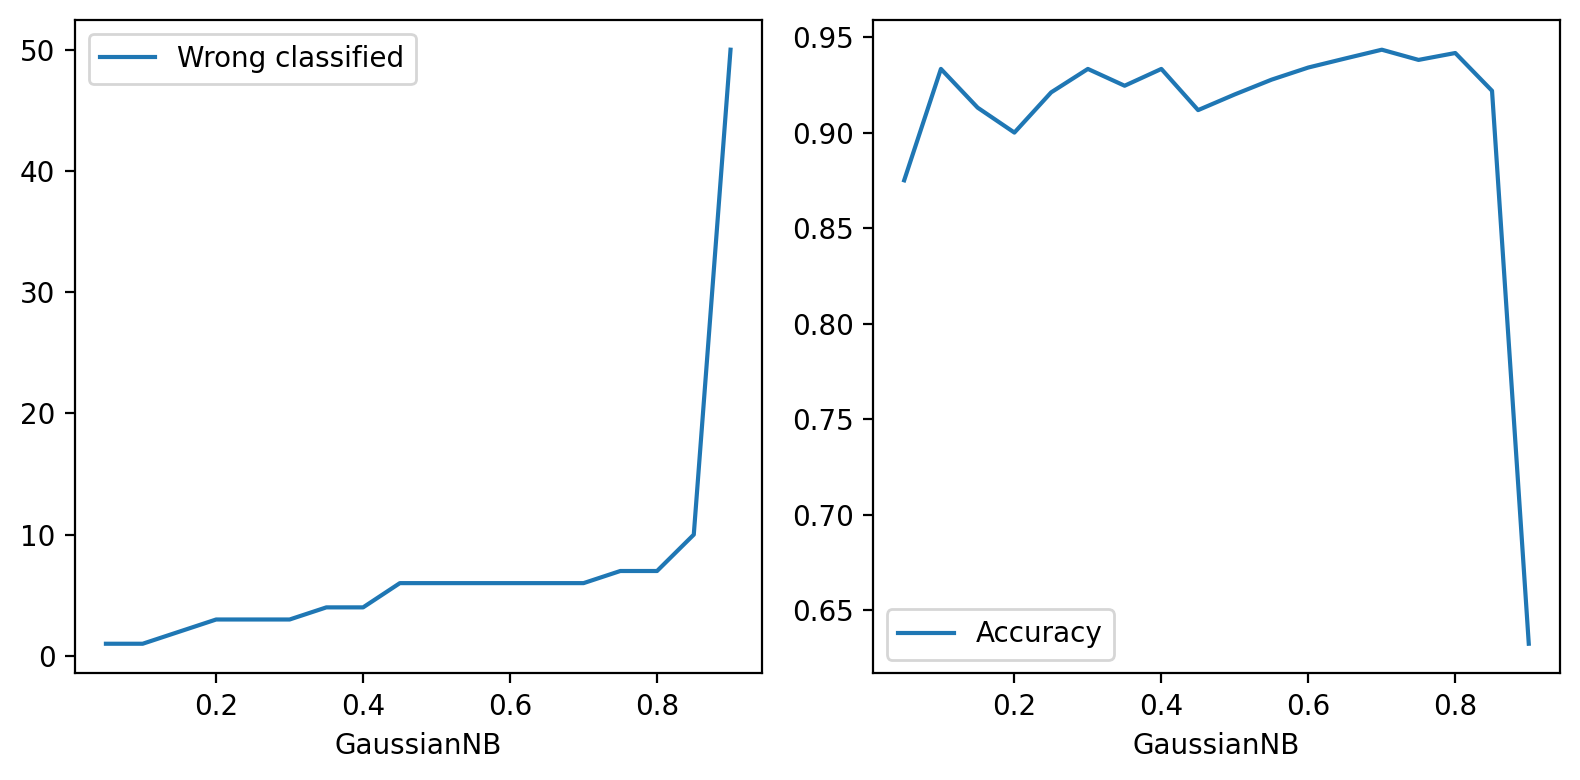

6
0.9433962264150944


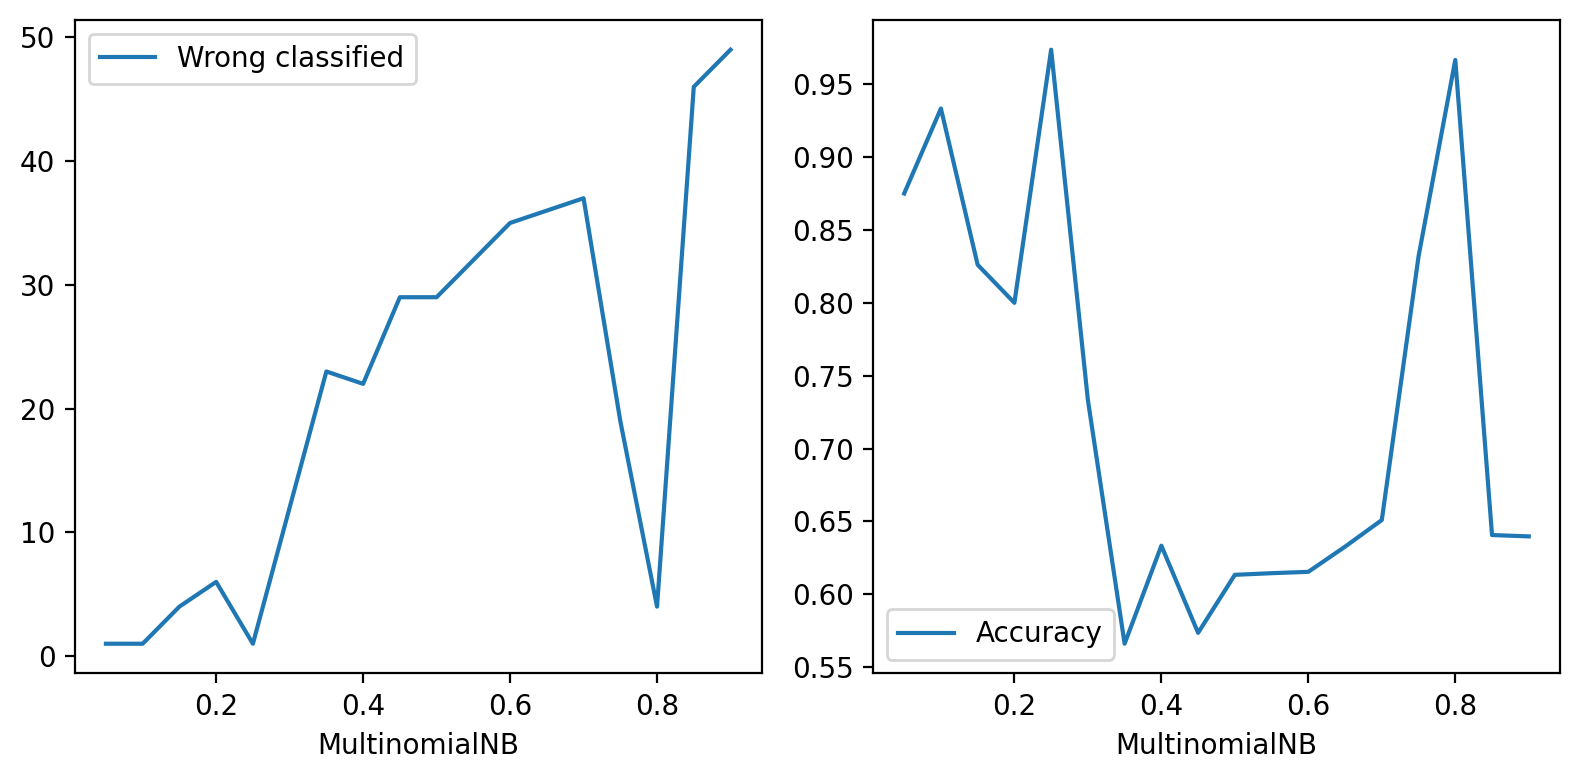

1
0.9736842105263158


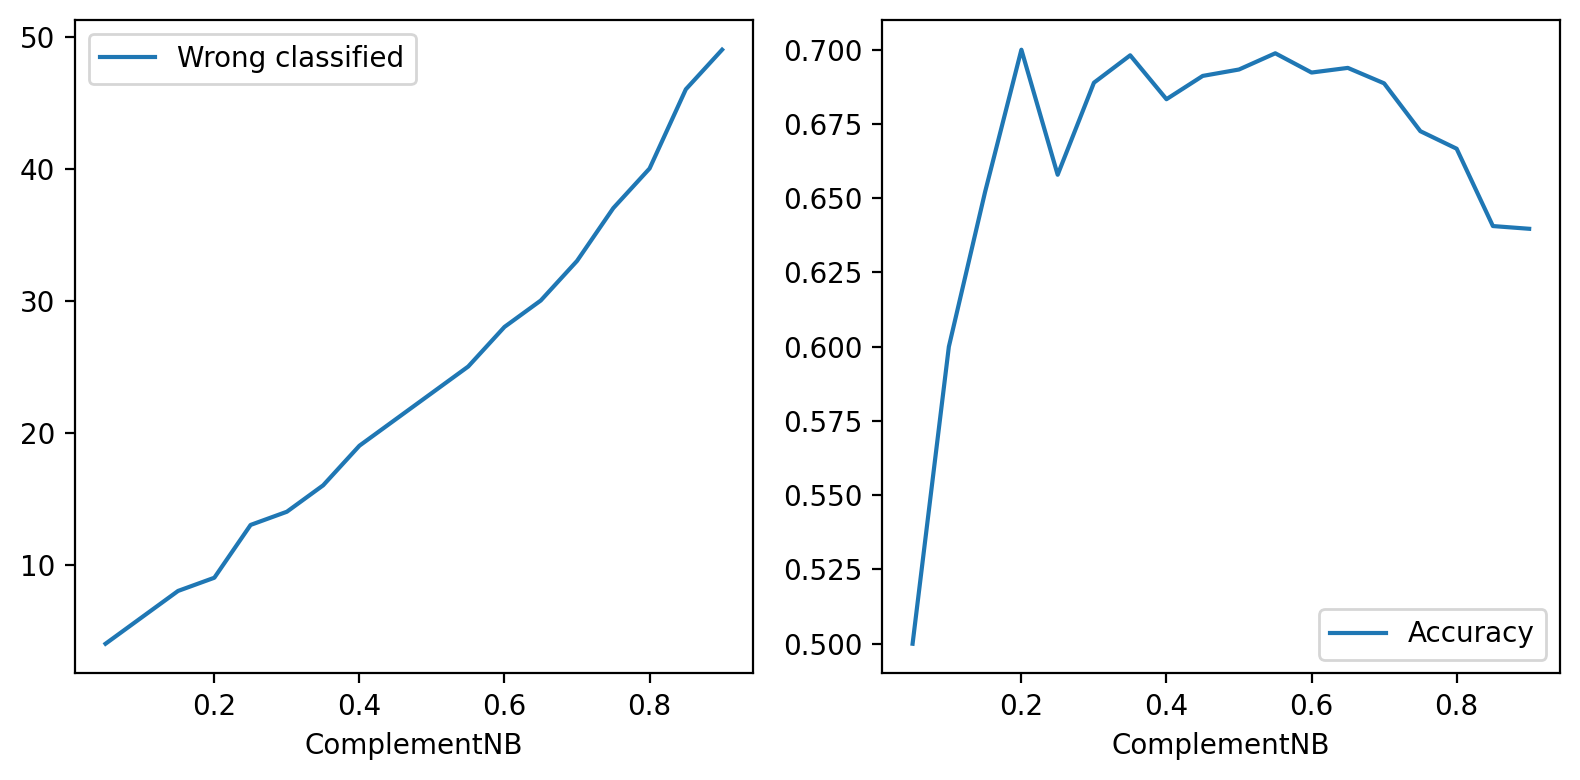

9
0.7


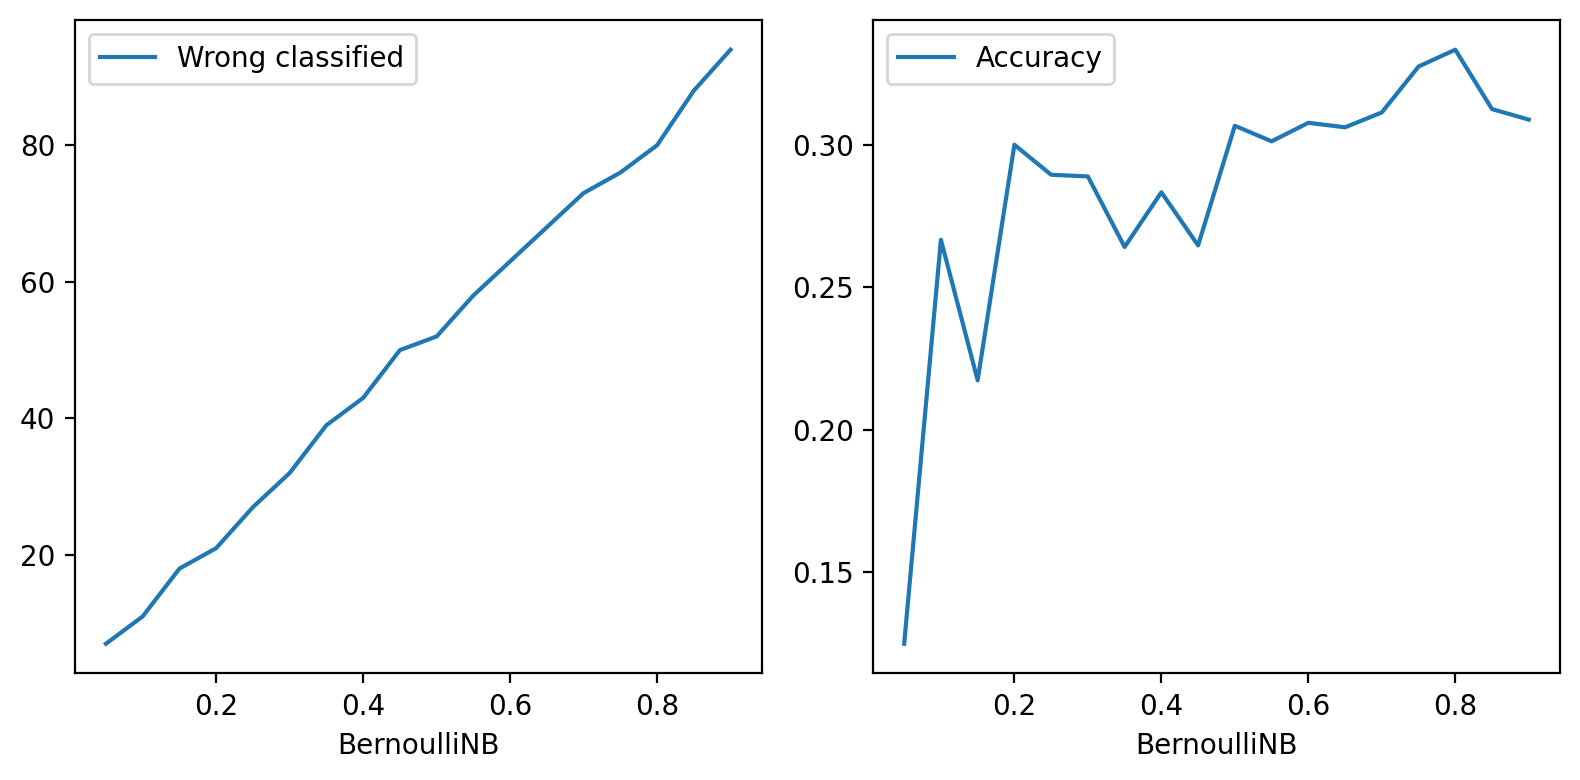

80
0.3333333333333333


In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

plot_clf(gnb, 'GaussianNB')
plot_clf(mnb, 'MultinomialNB')
plot_clf(cnb, 'ComplementNB')
plot_clf(bnb, 'BernoulliNB')

In [76]:
clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)

print('Wrong classified: ', (y_test != y_pred).sum())

Wrong classified:  5


In [77]:
print("Score: ", clf.score(X_test, y_test))

Score:  0.9333333333333333


In [78]:
print('Num of leaves: ', clf.get_n_leaves())
print('Depth: ', clf.get_depth())

Num of leaves:  5
Depth:  3


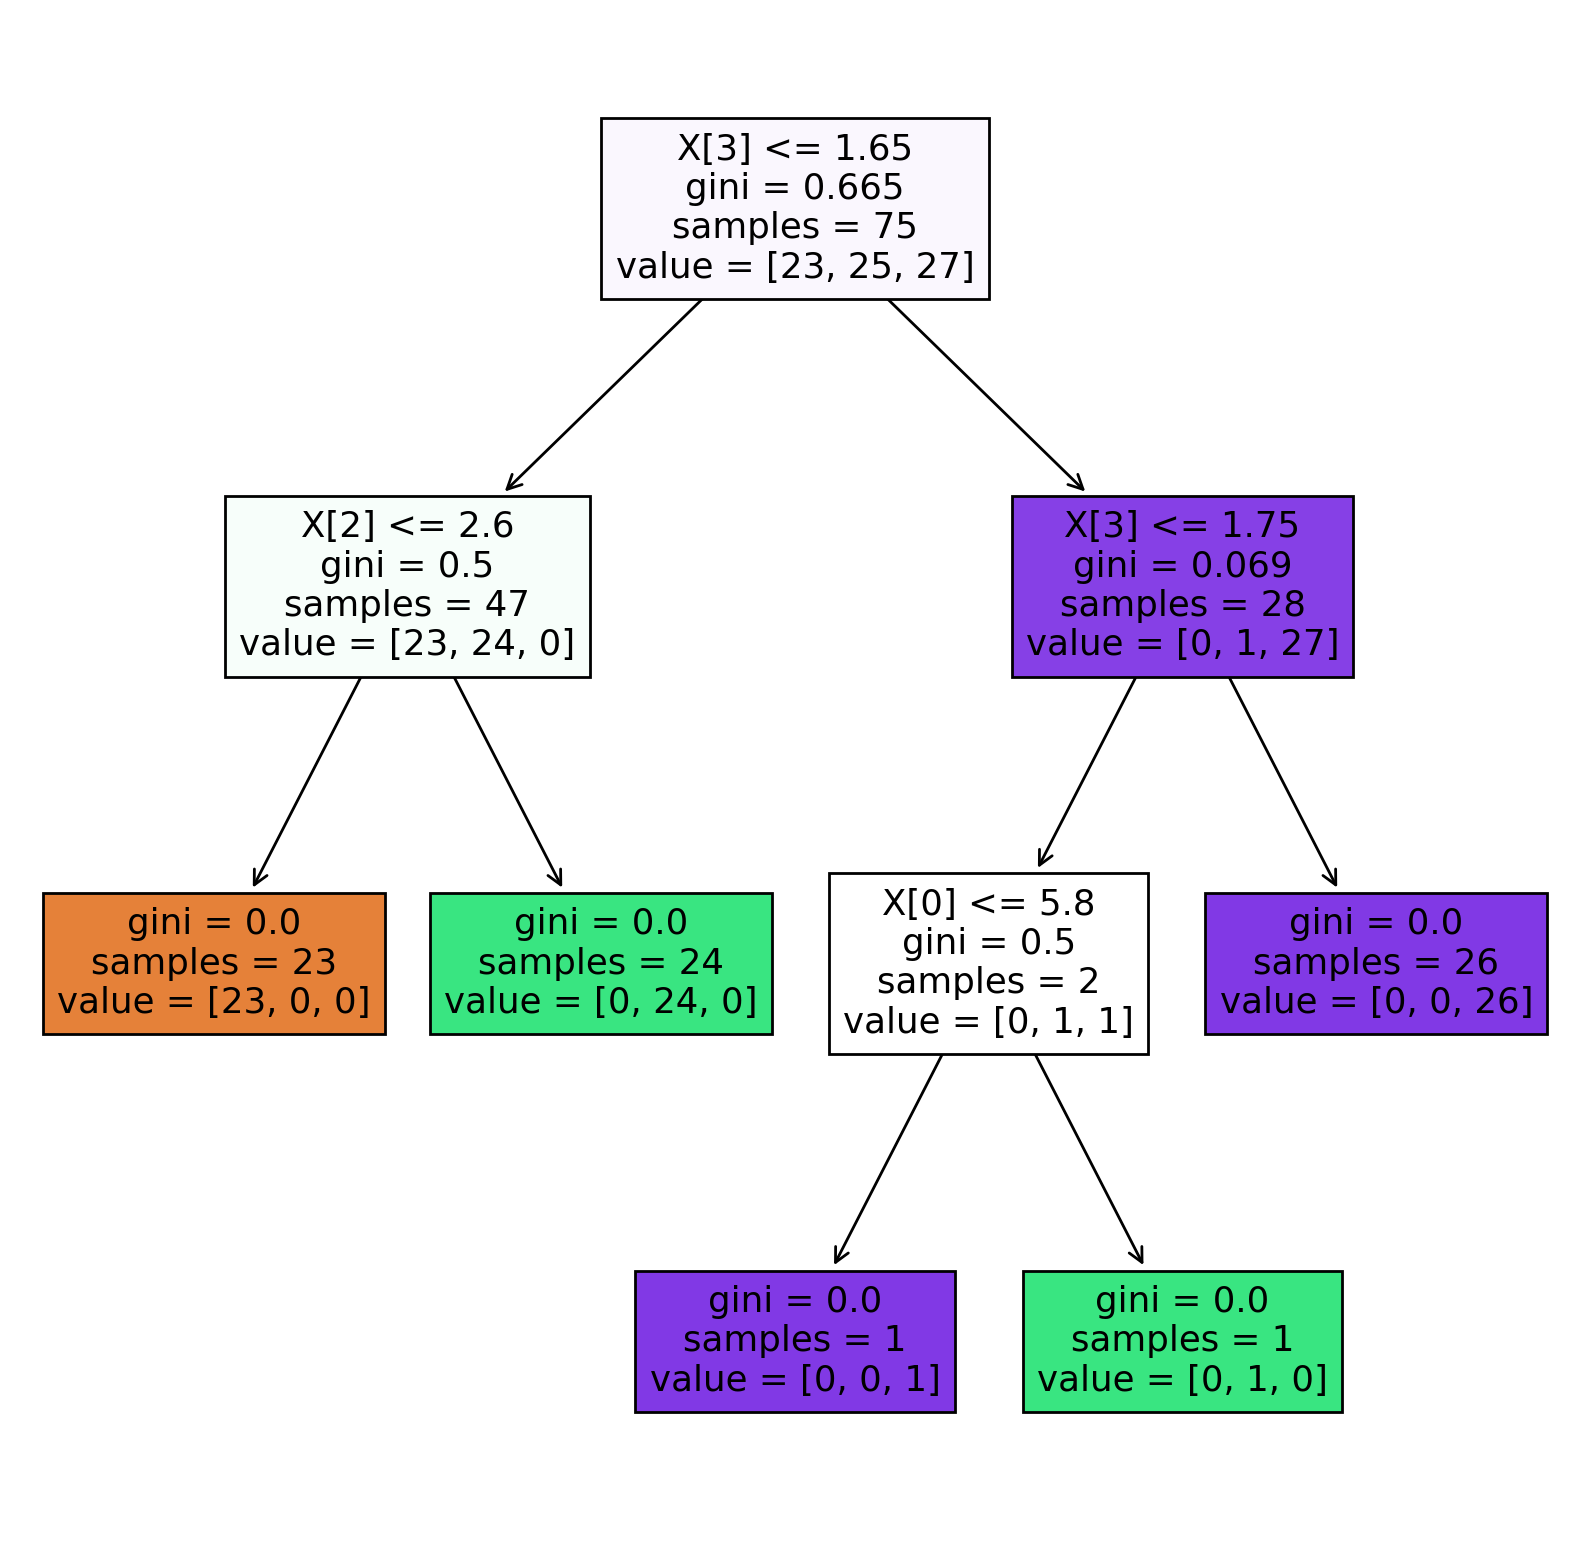

In [79]:
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

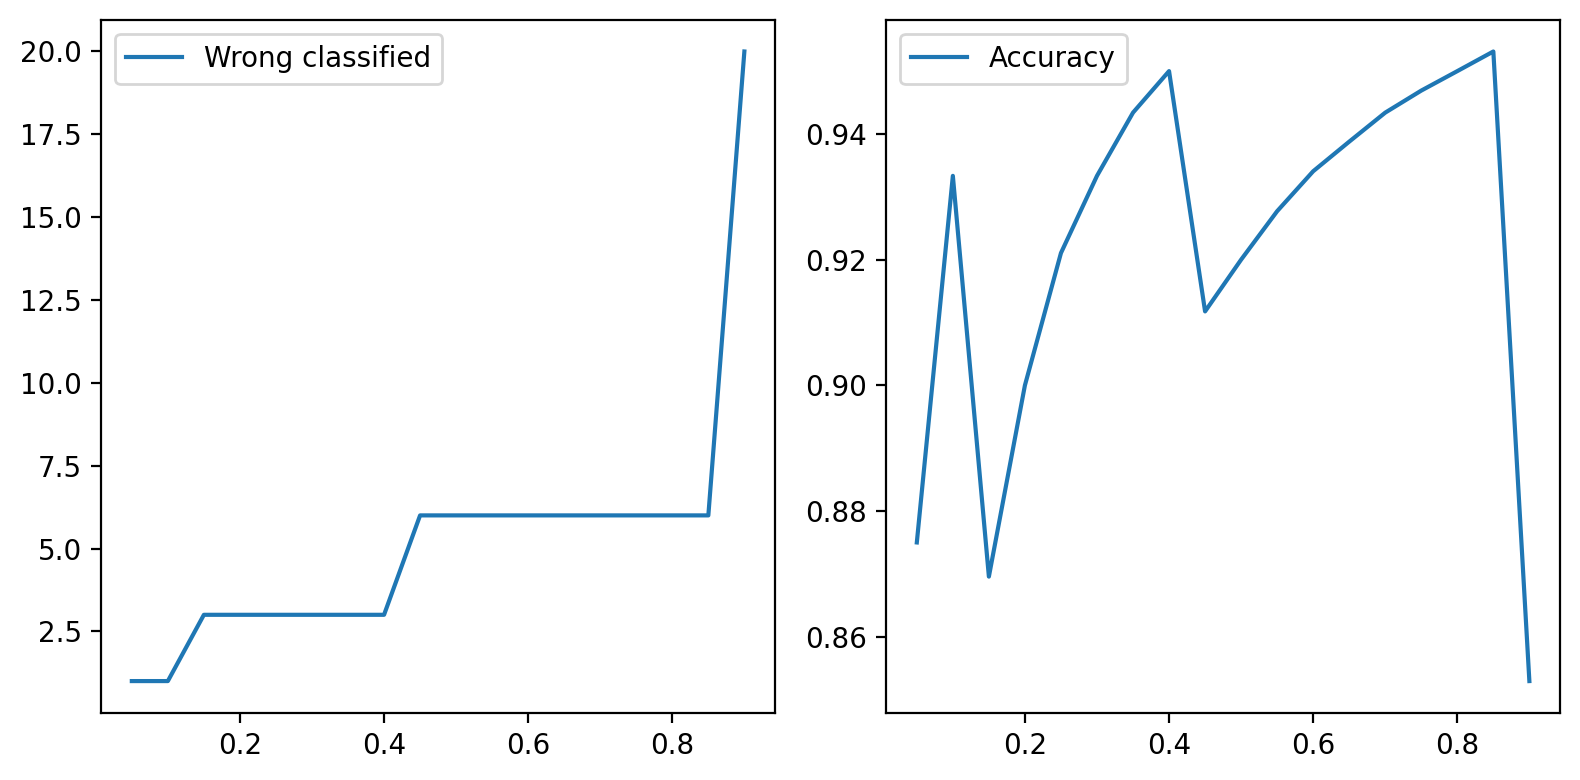

6
0.953125


In [80]:
plot_clf(clf)

### Criterion

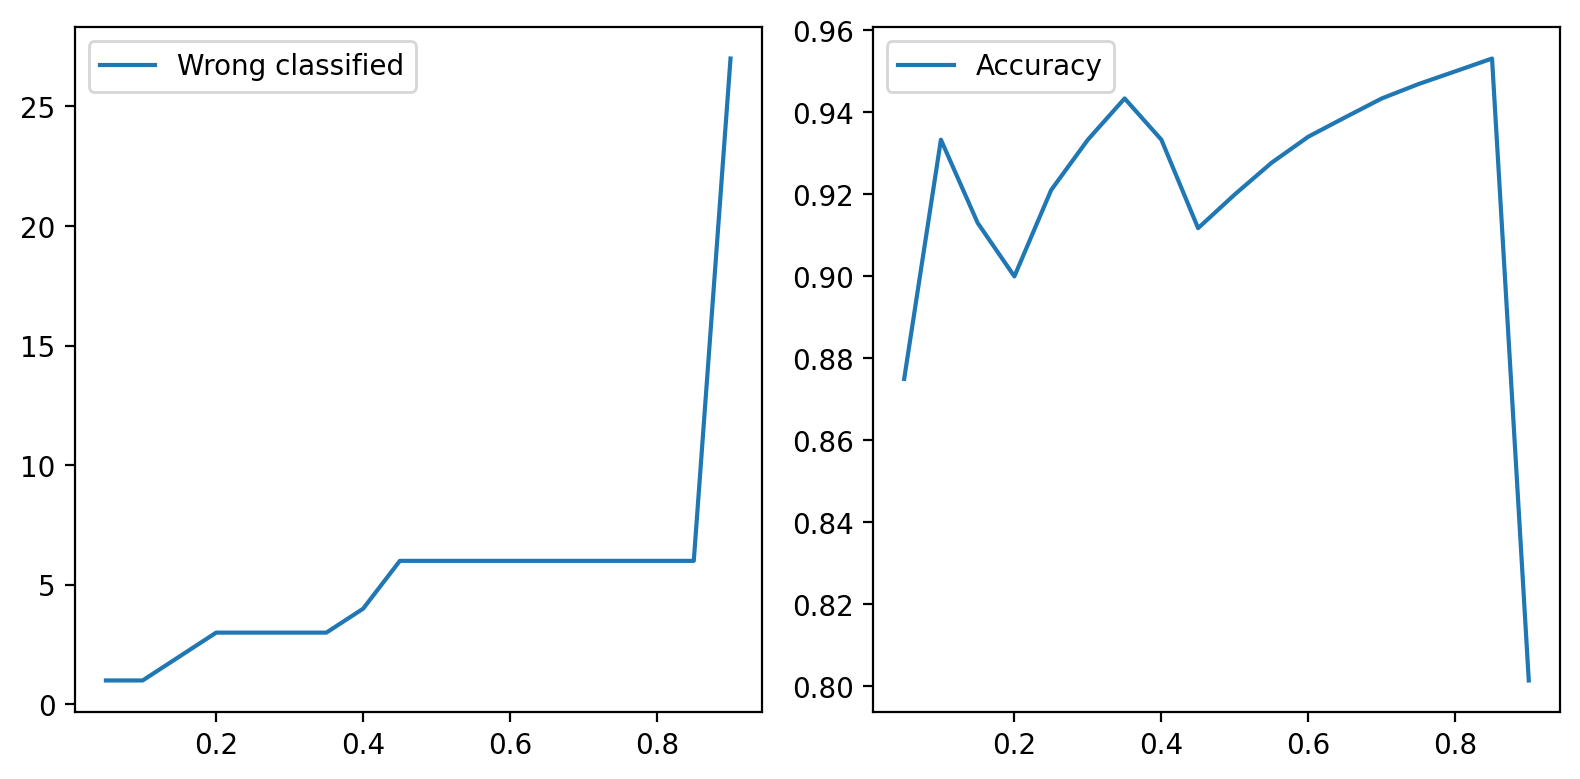

6
0.953125


In [81]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

plot_clf(clf)

### Splitter

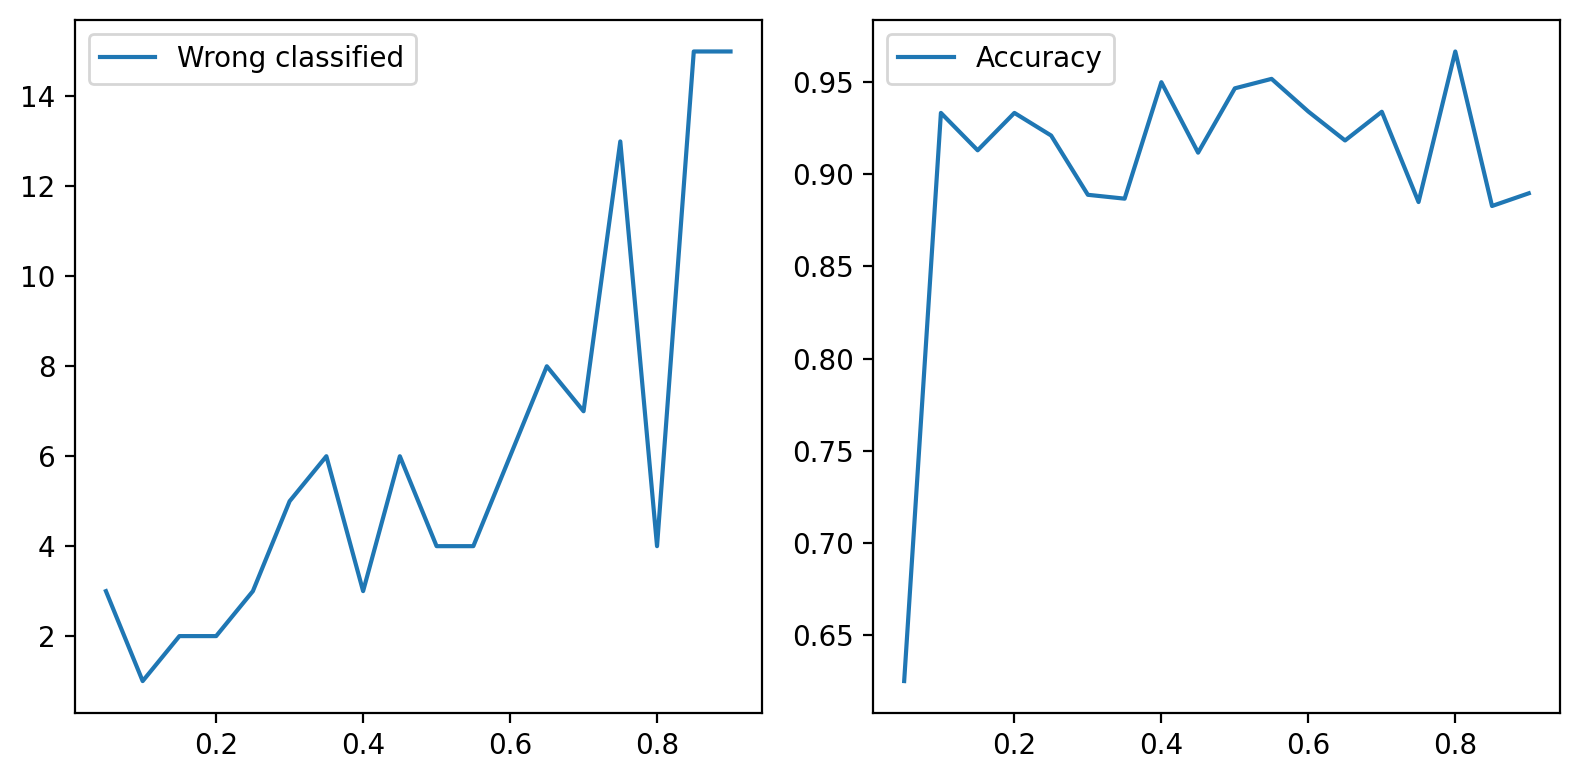

4
0.9666666666666667


In [92]:
clf = tree.DecisionTreeClassifier(splitter="random")

plot_clf(clf)

### Max_depth

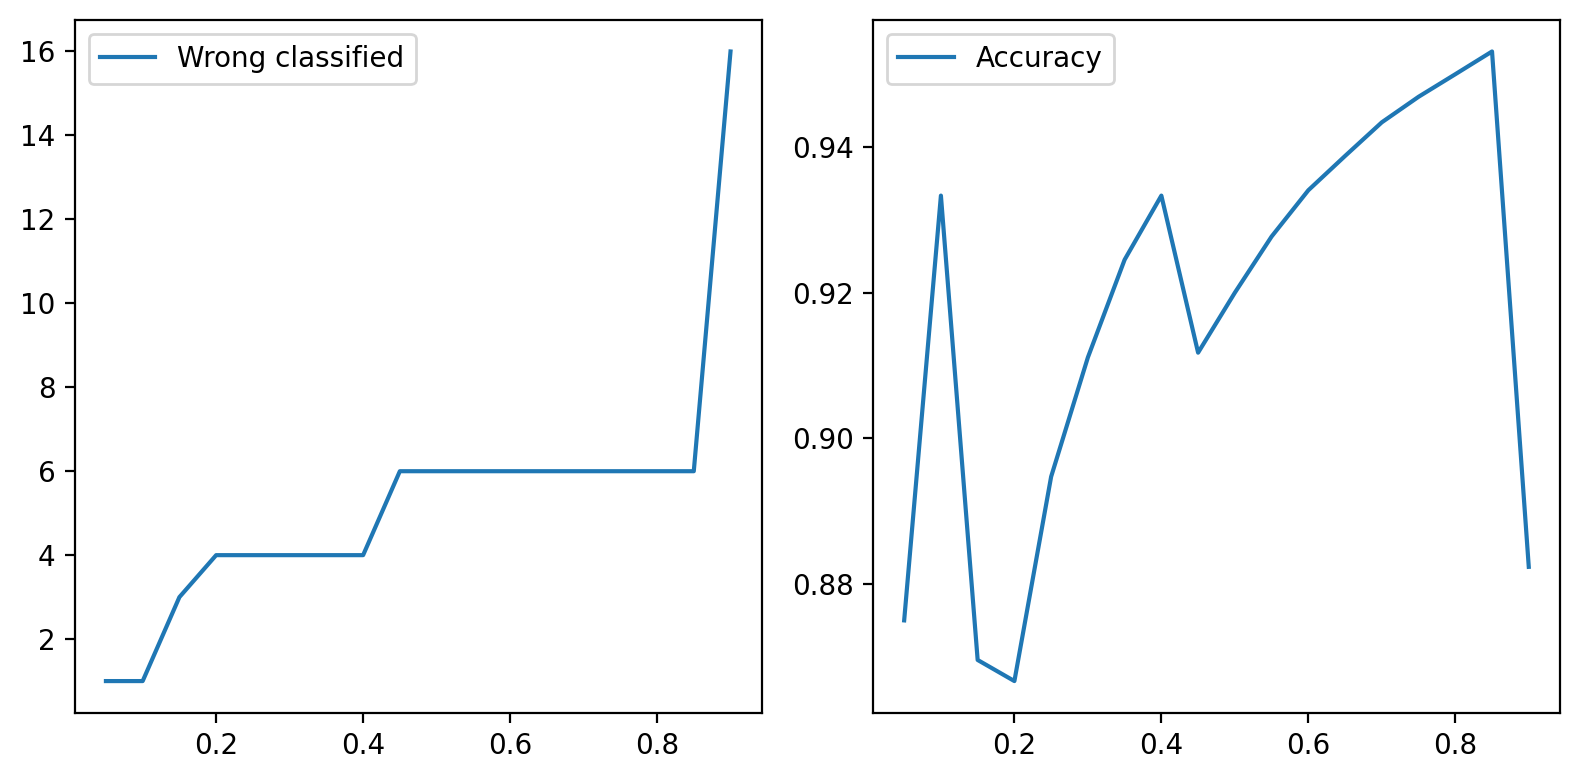

6
0.953125


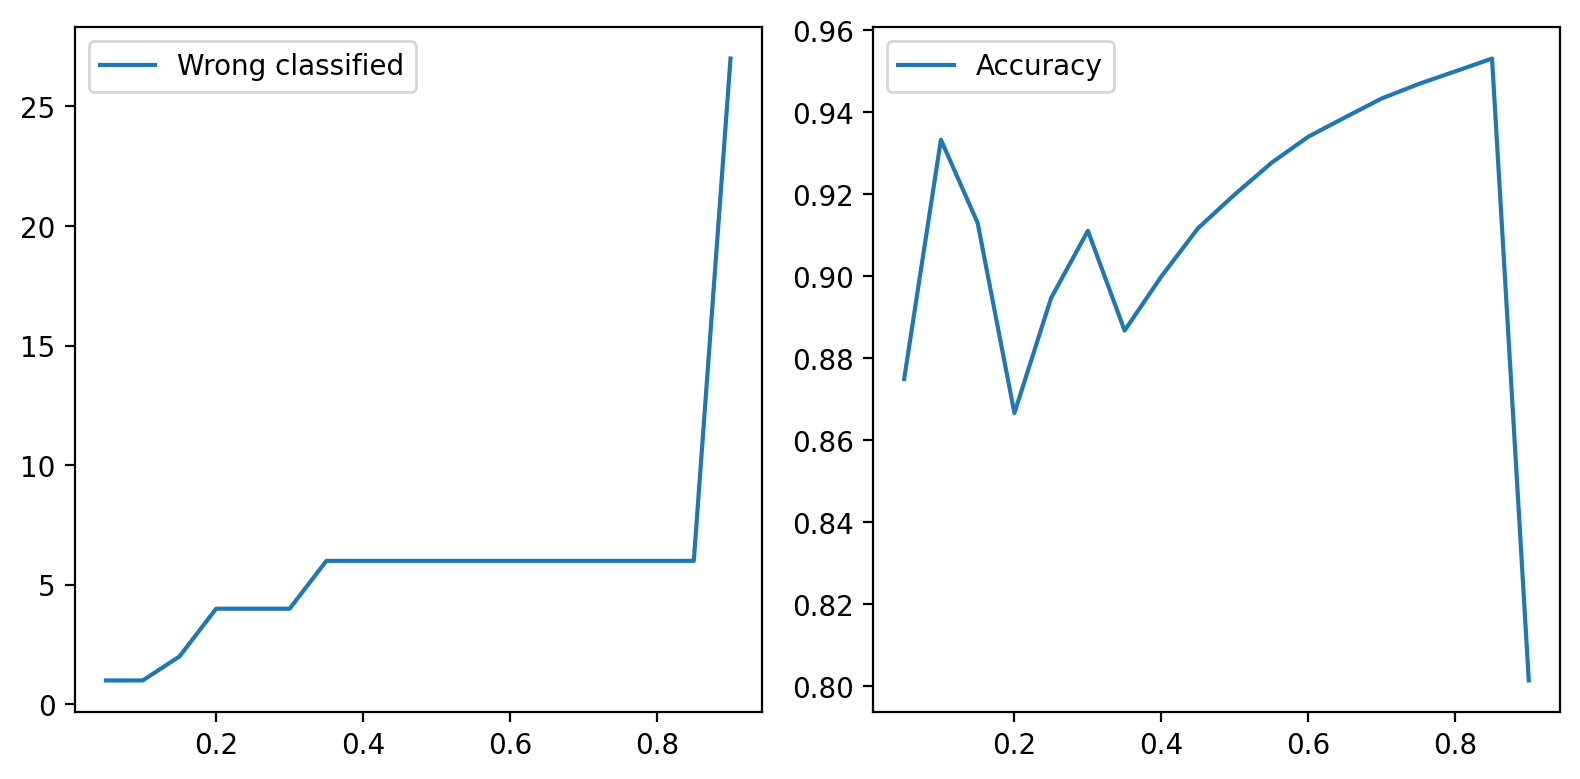

6
0.953125


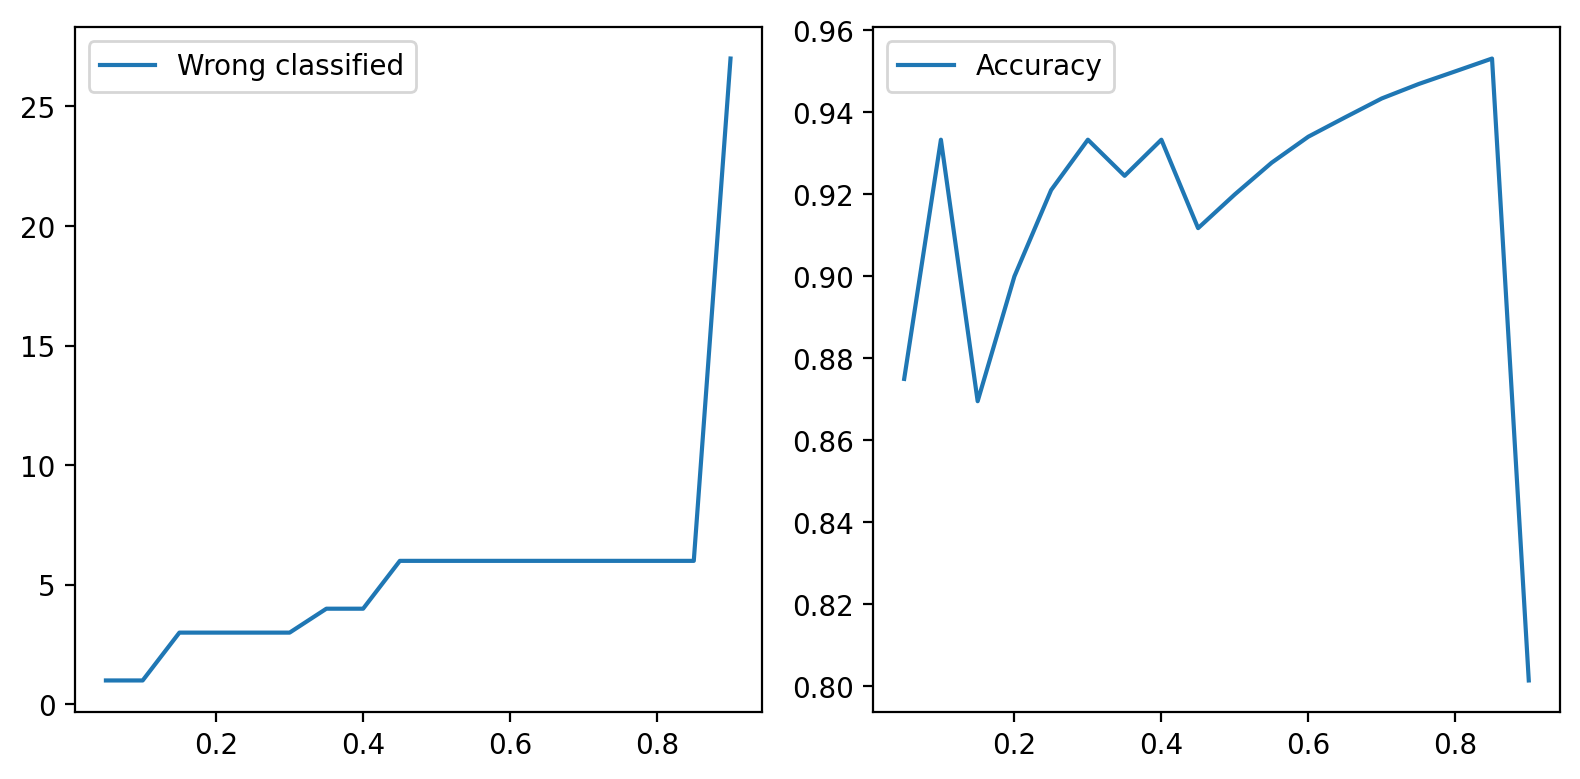

6
0.953125


In [93]:
depths = np.arange(2, 5, 1)
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    plot_clf(clf)

### Min_samples_split

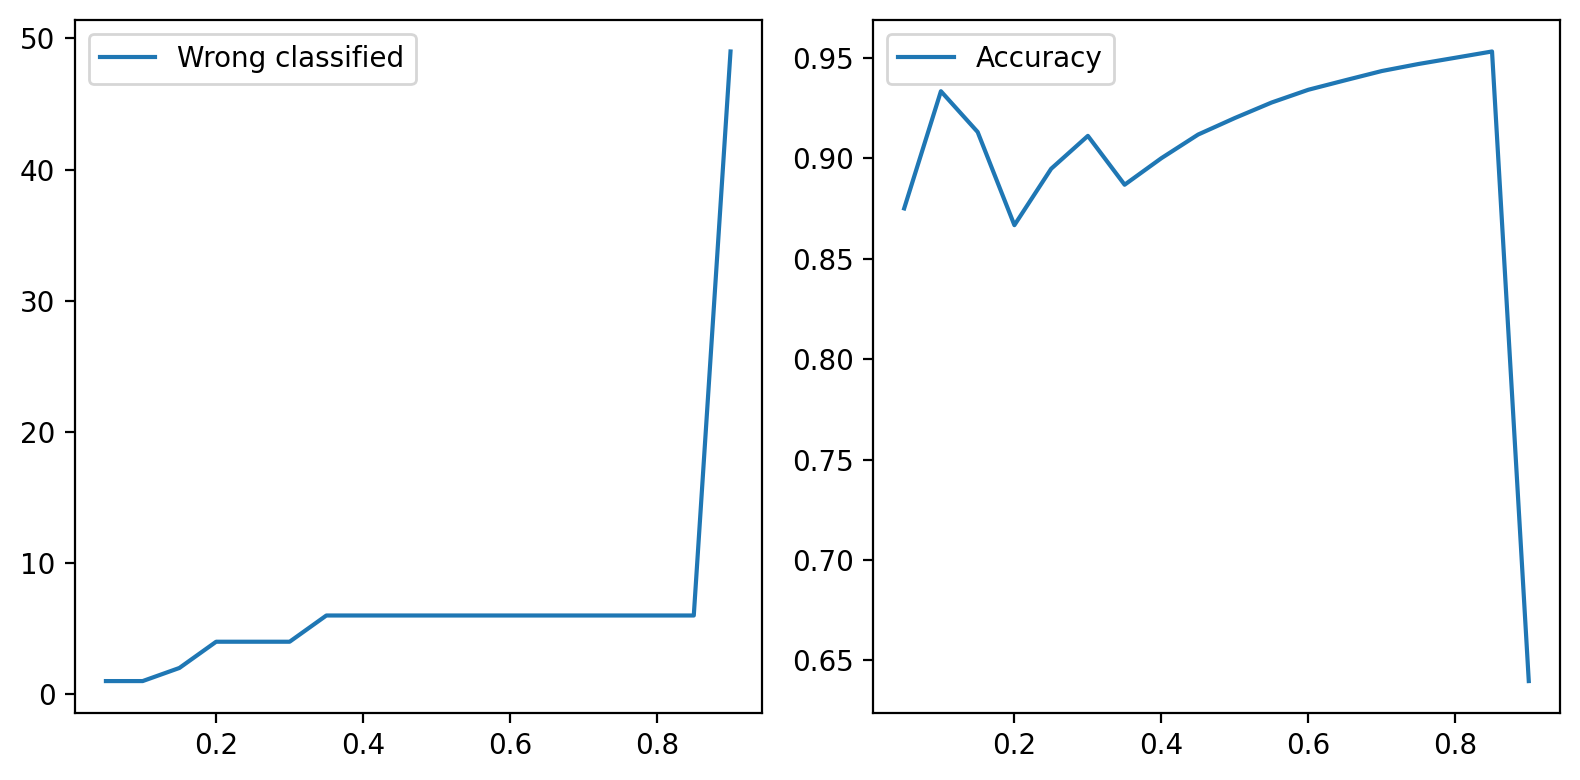

6
0.953125


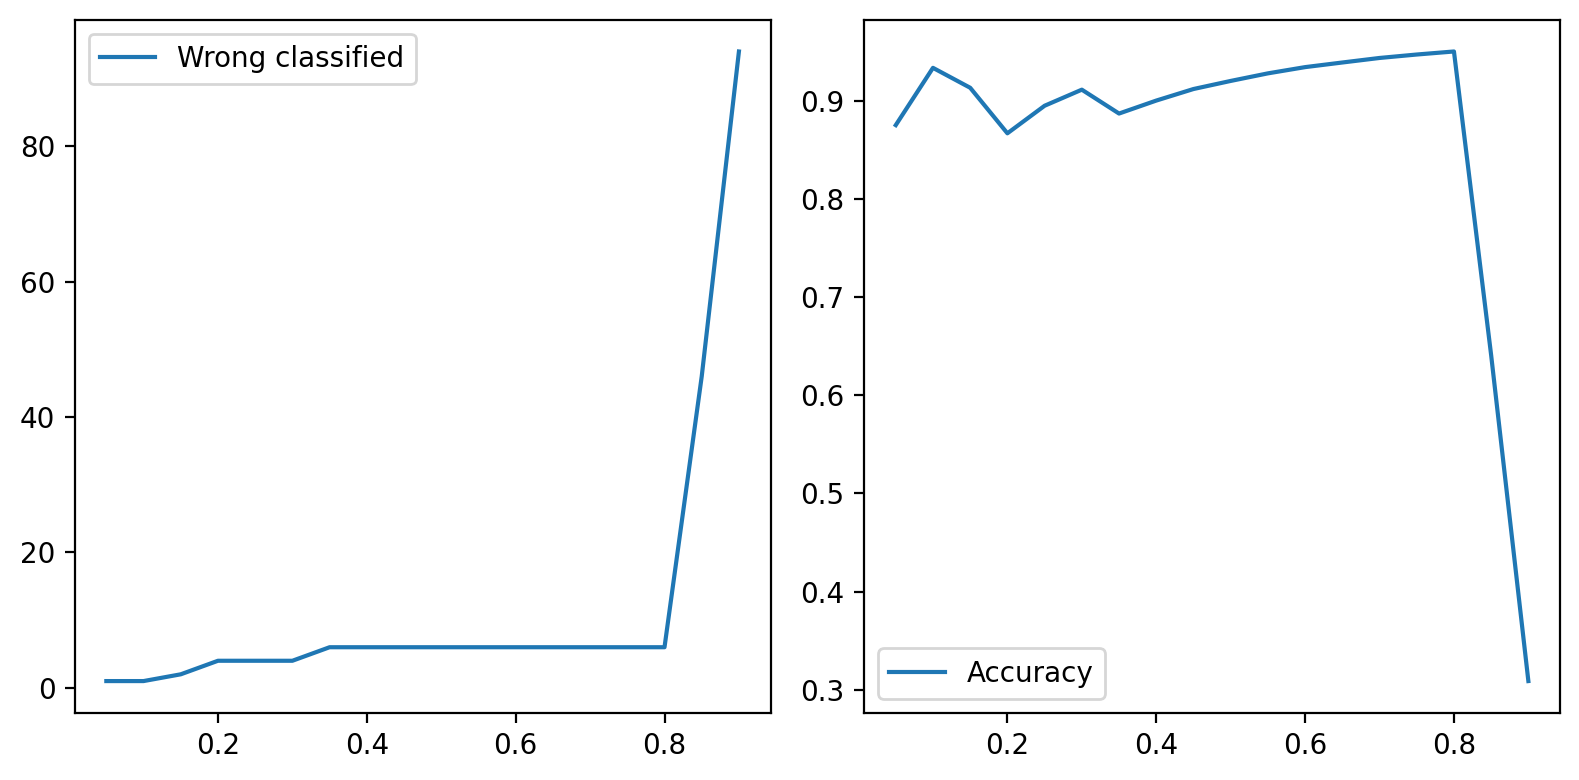

6
0.95


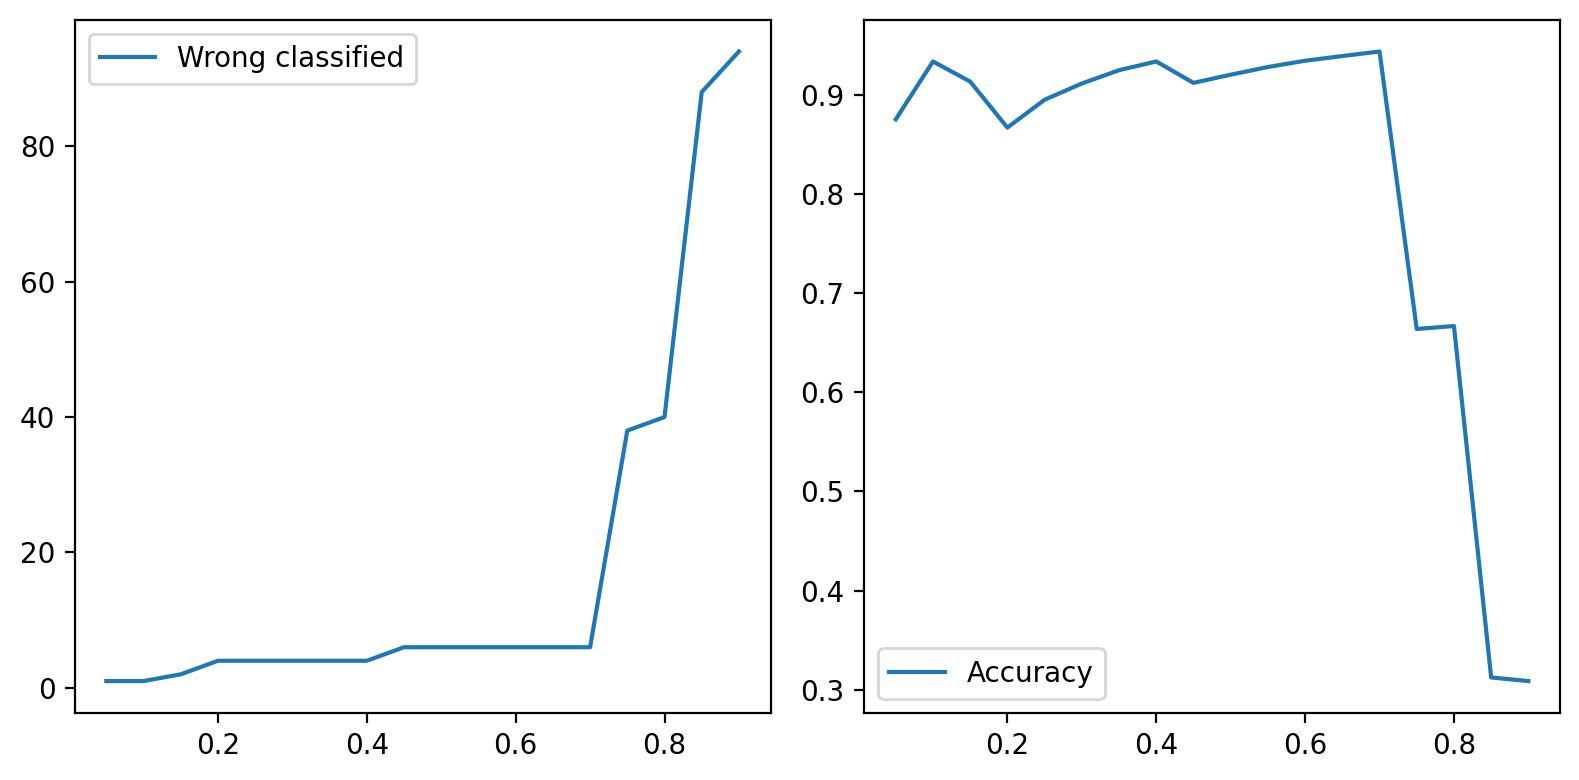

6
0.9433962264150944


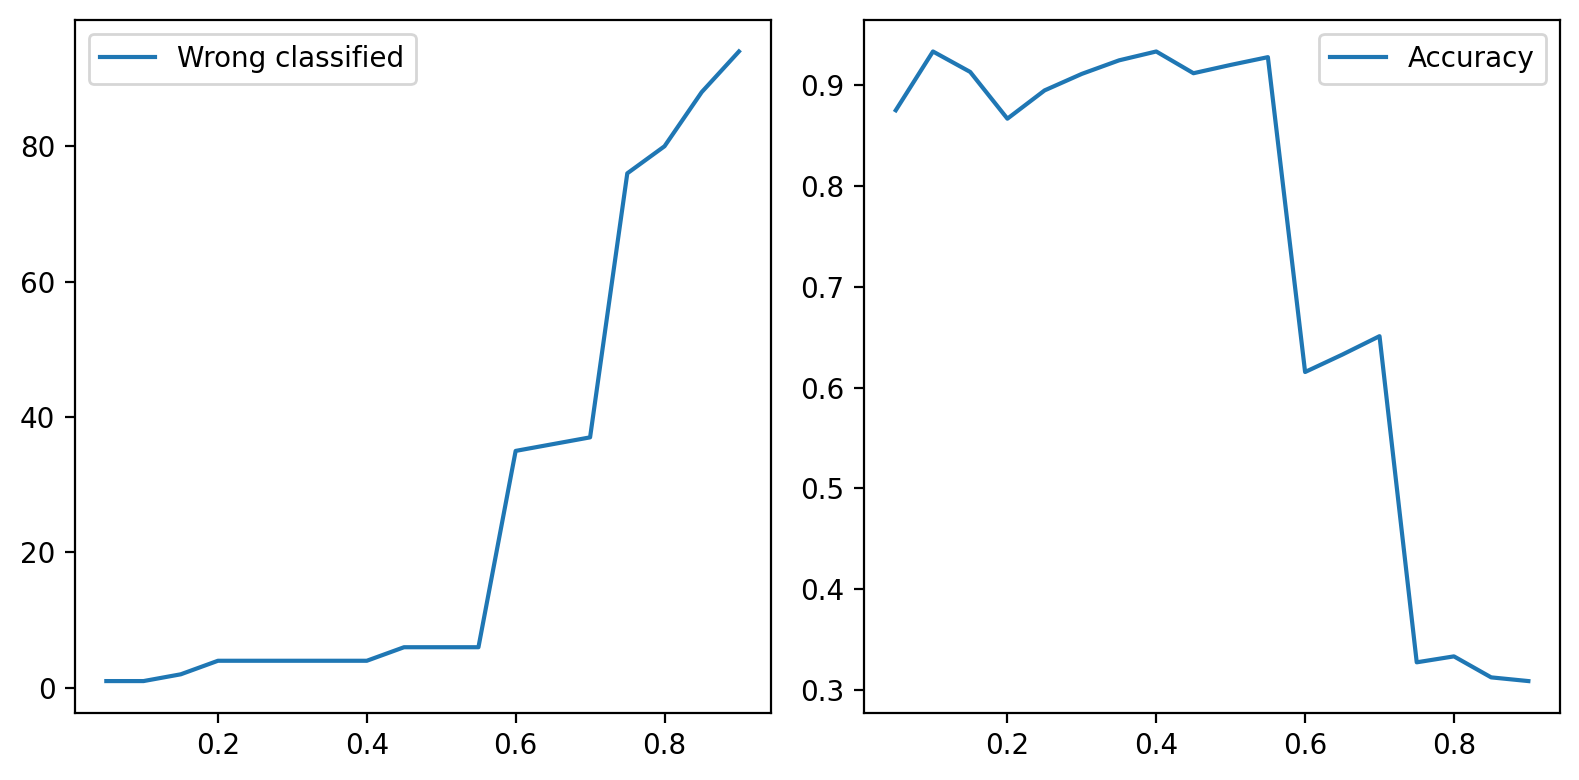

1
0.9333333333333333


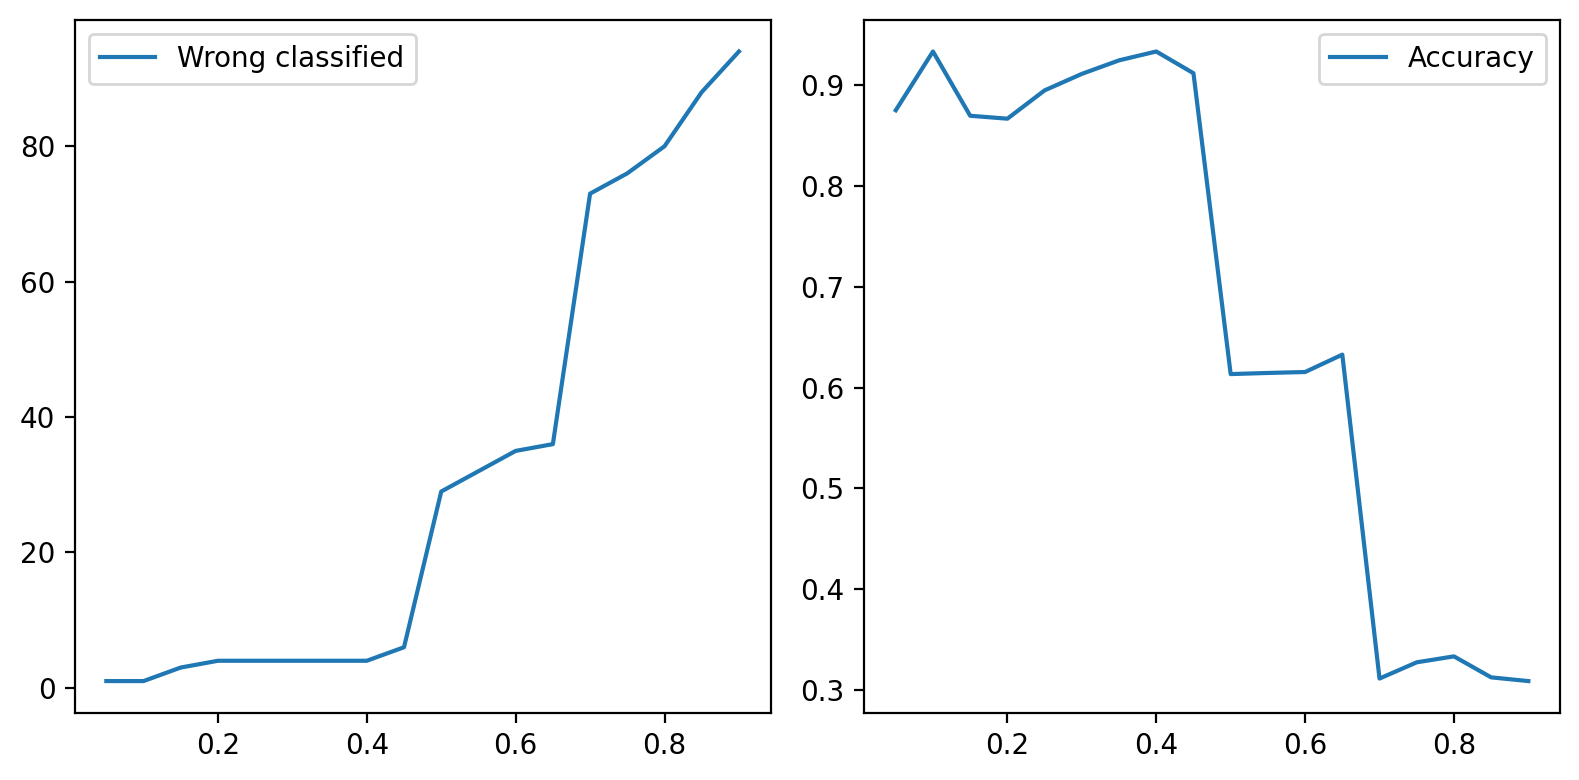

1
0.9333333333333333


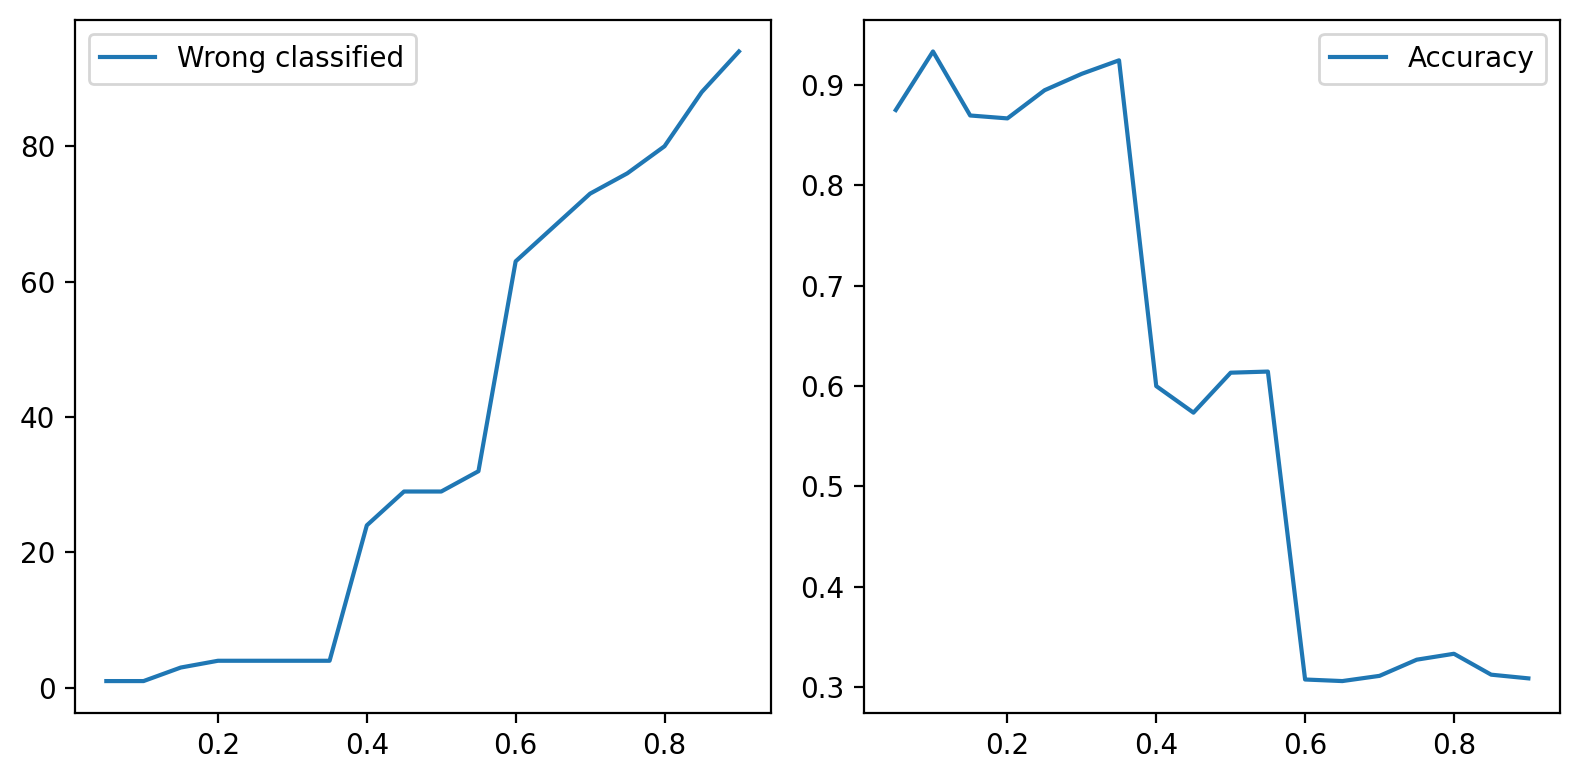

1
0.9333333333333333


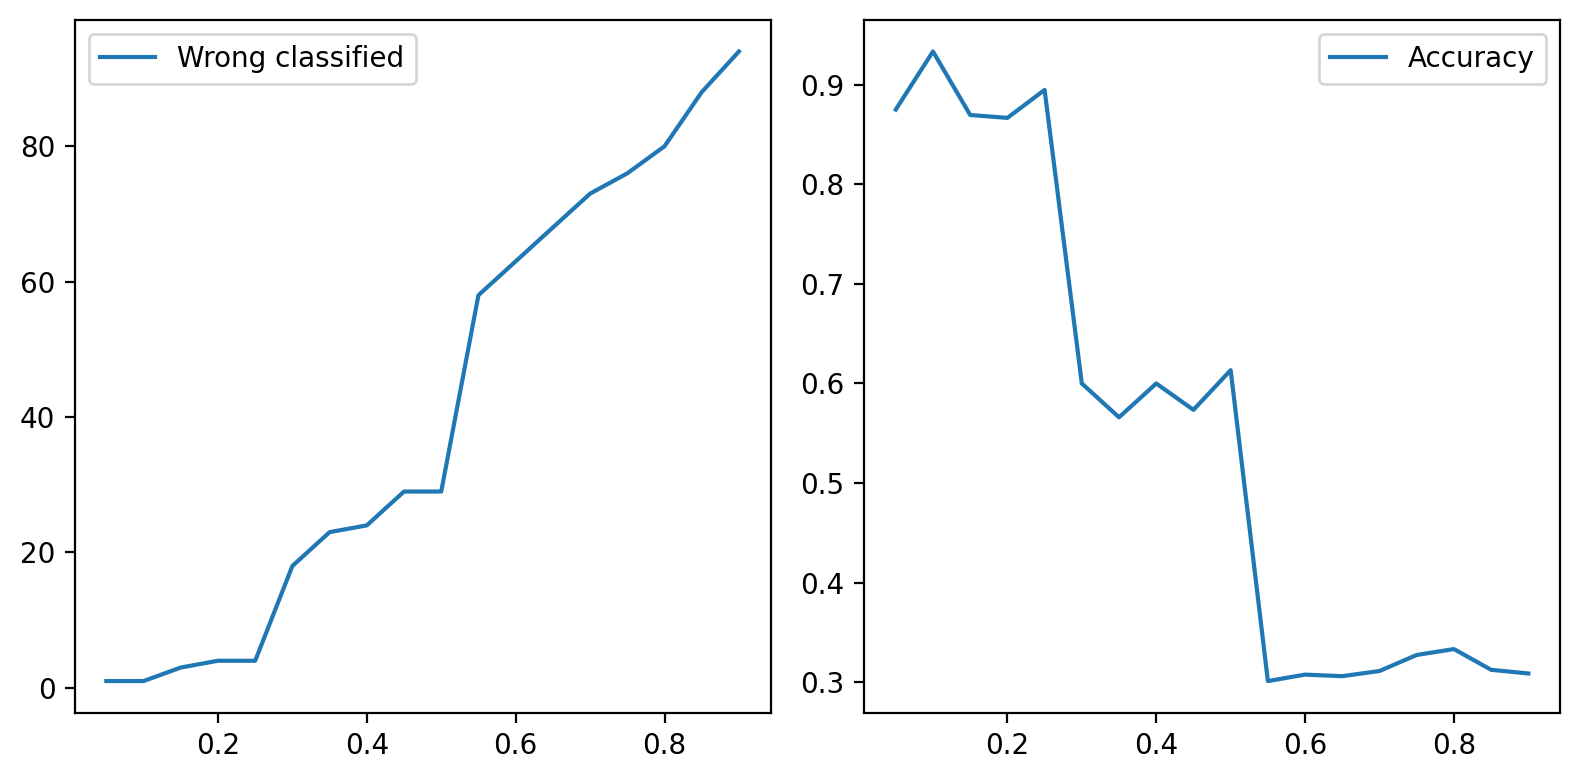

1
0.9333333333333333


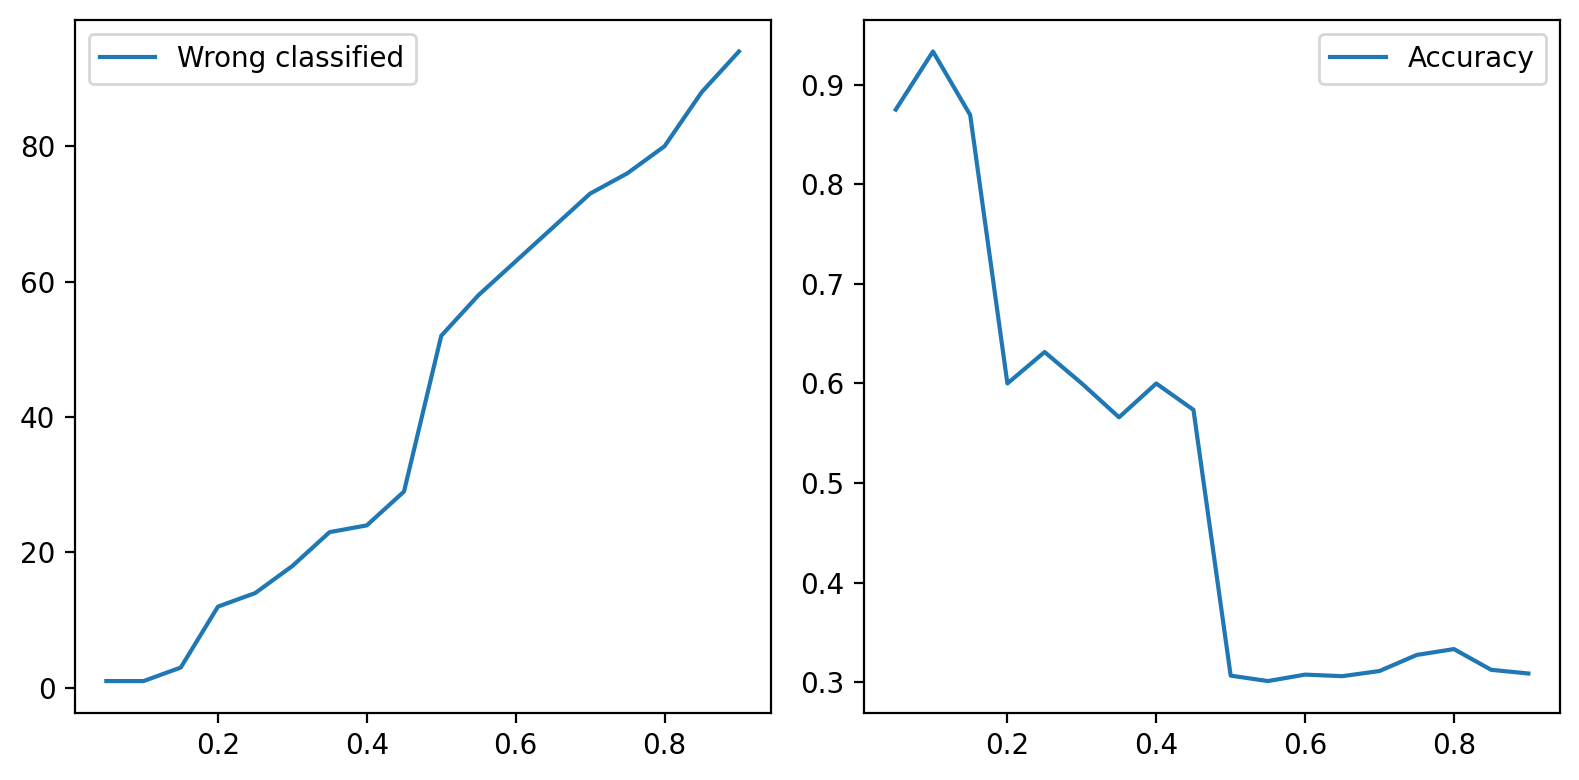

1
0.9333333333333333


In [94]:
min_samples = np.arange(10, 90, 10)
for min_sample in min_samples:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_sample)
    plot_clf(clf)

### Min_samples_leaf

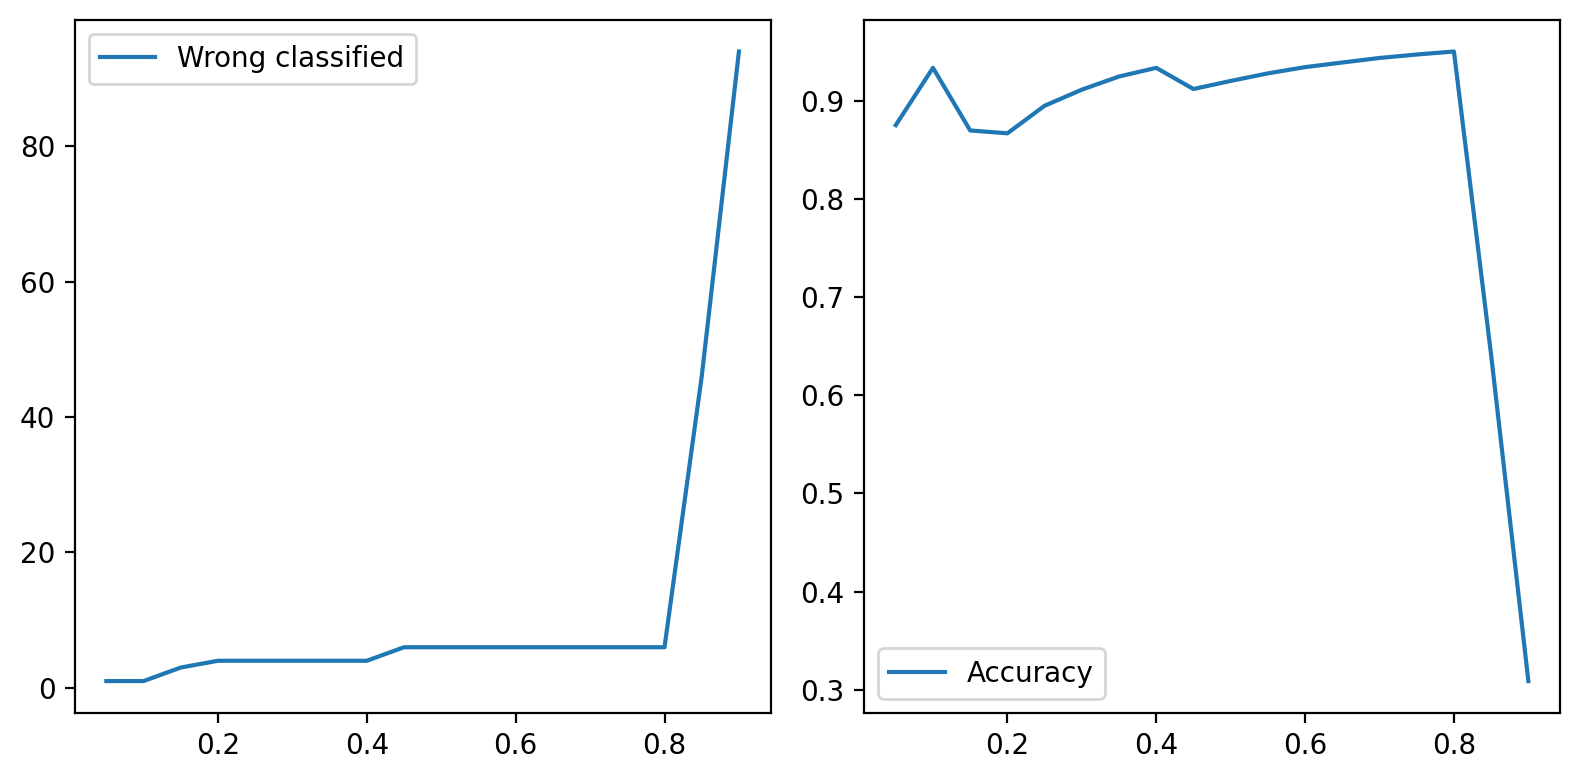

6
0.95


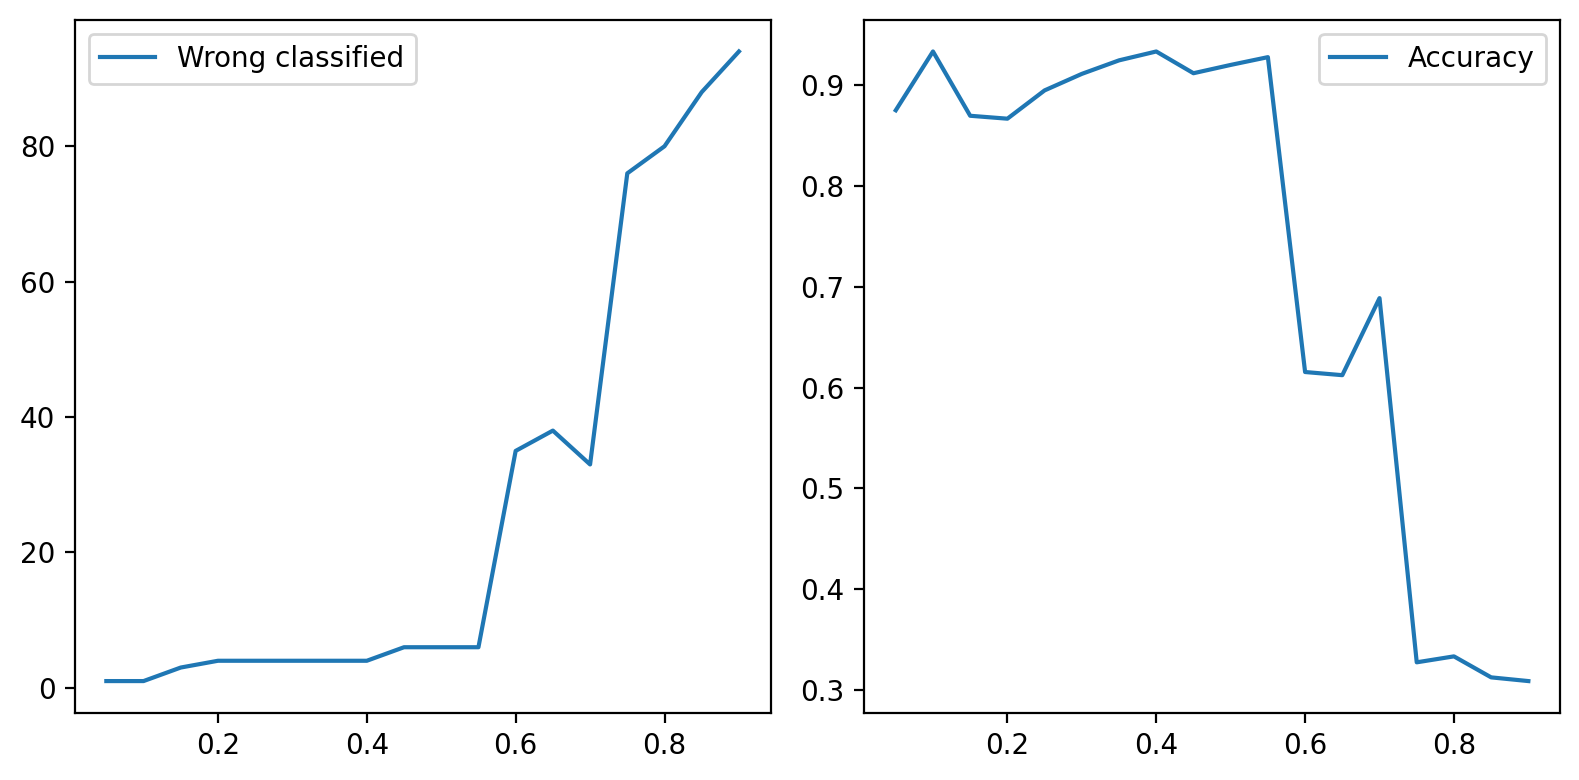

1
0.9333333333333333


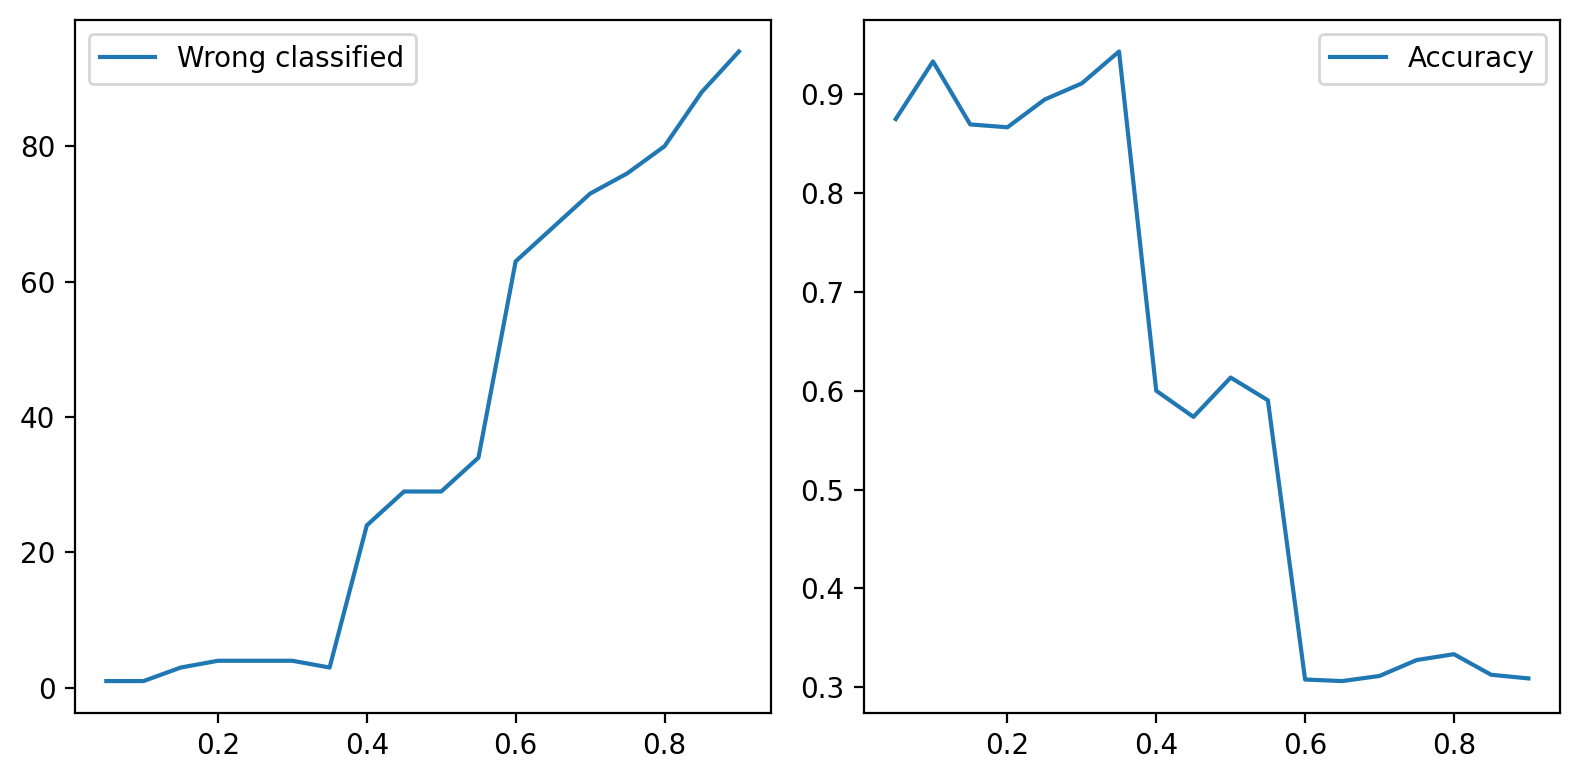

3
0.9433962264150944


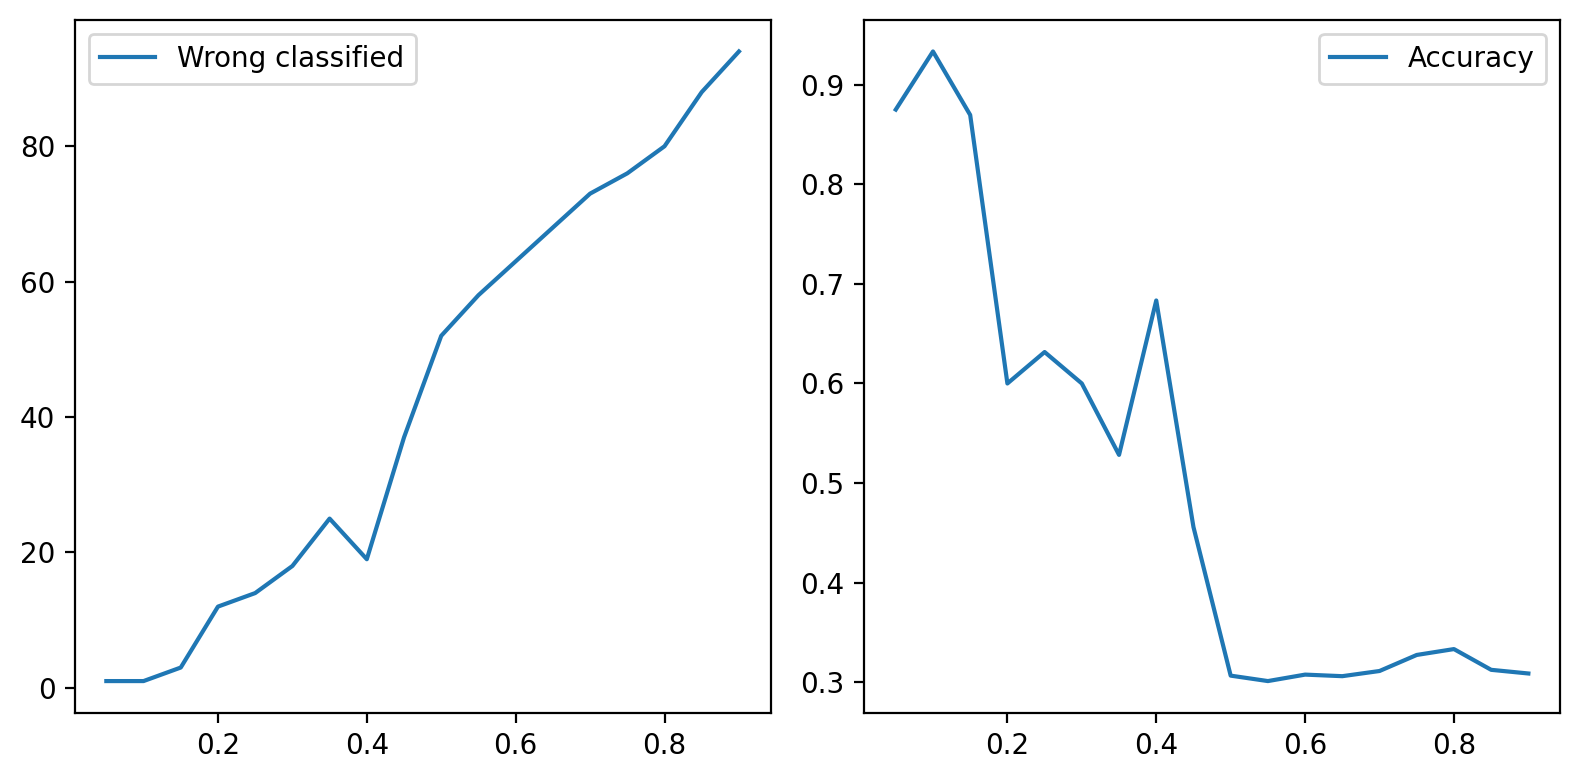

1
0.9333333333333333


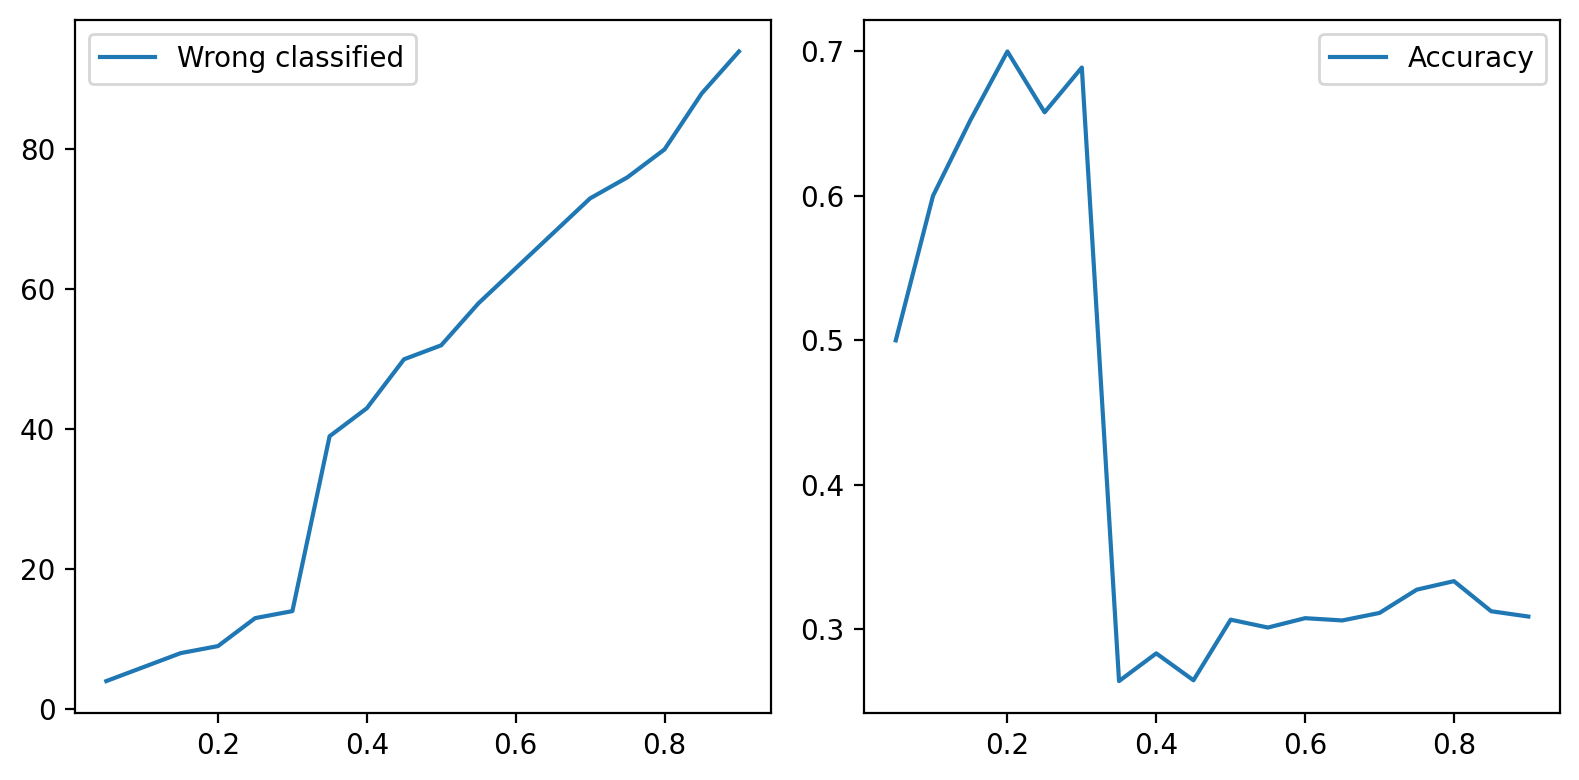

9
0.7


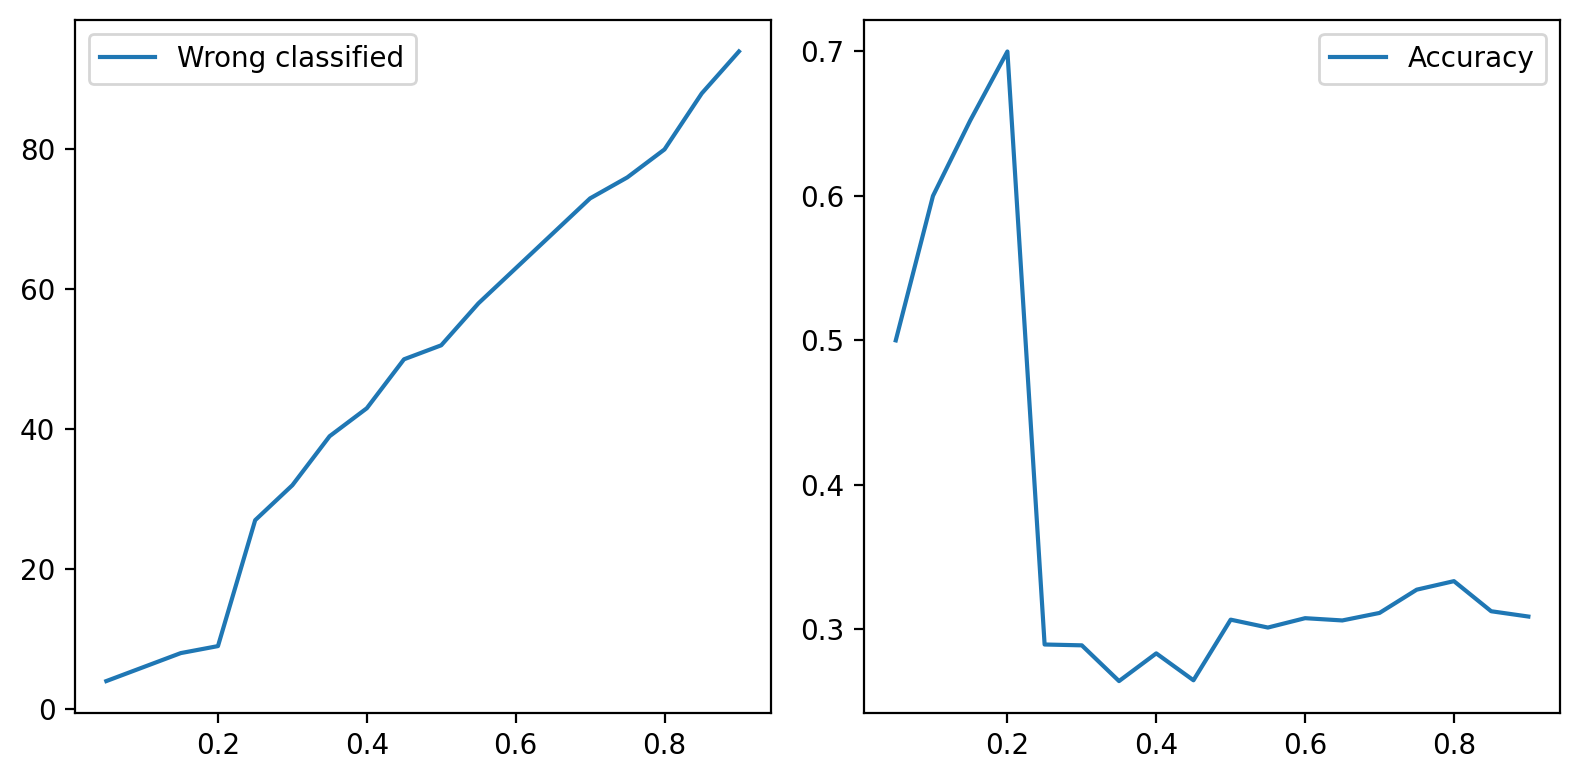

9
0.7


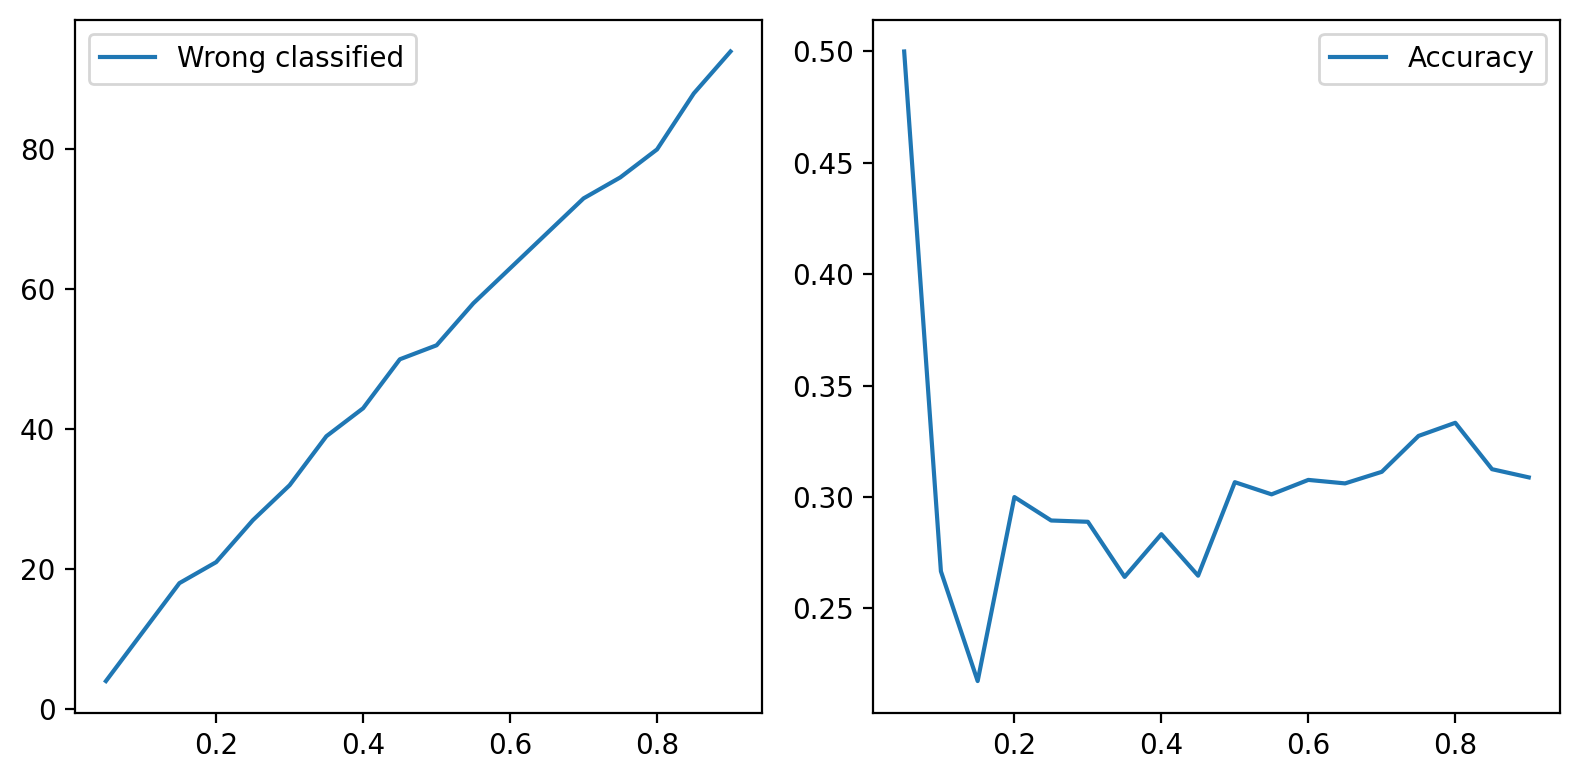

4
0.5


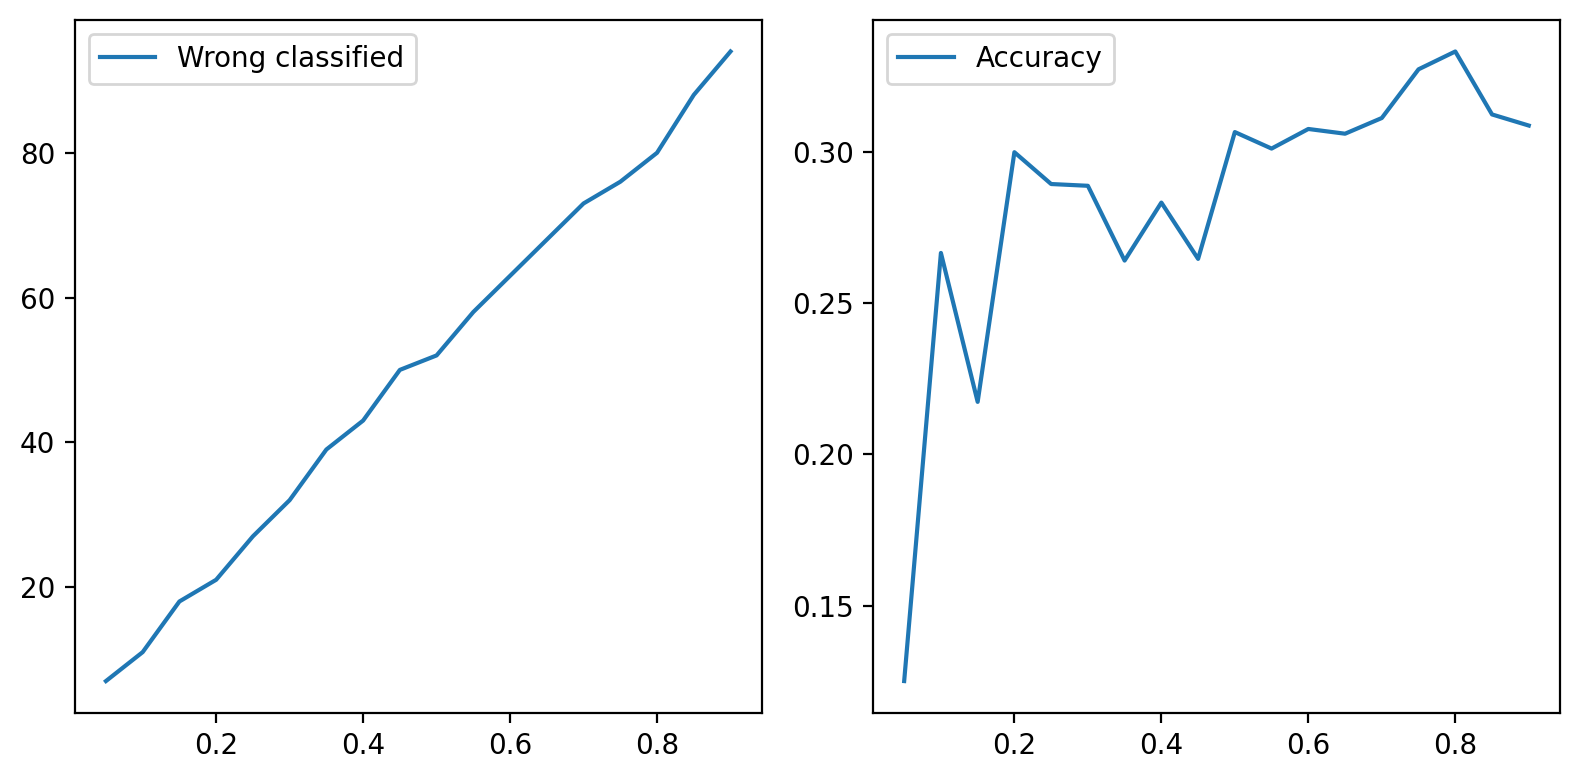

80
0.3333333333333333


In [89]:
min_samples = np.arange(10, 90, 10)
for min_sample in min_samples:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_sample)
    plot_clf(clf)